# Divide-and-conquer

## Factorials
$$ 0!=1 $$
$$ n!=n*(n-1)! $$ for $n \geq 1$

In [3]:
function fact(n)
    if n==0
        return 1
    end
    return n*fact(n-1)
end

fact (generic function with 1 method)

## Hanoi towers game rules
1. Only one disk can be moved at a time.
2. A disk can only be moved if it’s the uppermost disk on a stack.
3. No disk can be placed on top of a smaller disk.

With three stacks, the computation time is $T(n)=2^n-1$

In [4]:
function hanoi(n, a="a", b="b", c="c") #n number of disks, a source, b helper, c target
    if n == 0
        return #no disks on the stack
    end
    hanoi(n-1,a,c,b) #first construct an hanoi tower with n-1 disks on b
    println("$a->$c")
    hanoi(n-1, b, a, c) #move the hanoi tower from b to c
end

hanoi (generic function with 4 methods)

In [5]:
hanoi(3)

a->c
a->b
c->b
a->c
b->a
b->c
a->c


## Sierpinski's triangle
Construct a fractal attractive fixed set with the overall shape of an equilateral triangle, subdivided recursively into smaller equilateral triangles

In [7]:
function sierpinski(n)
    px = [0, 0, 1]
    py = [0, 1, 0]
    function recursion(n, px, py)
        n == 1 && return px, py
        a = 2^(n-2)
        psub = recursion(n-1, px, py) #triangle in lower-left position
        pright = recursion(n-1, px+a*ones(Int128, length(px)), py)  #triangle in lower-right position (shift the 1st triangle by a)
        pup = recursion(n-1, px, py+a*ones(Int128, length(py)))
        return [psub[1]; NaN; pright[1]; NaN; pup[1]], [psub[2]; NaN; pright[2]; NaN; pup[2]]
    end
    recursion(n, px, py)
end
px, py = sierpinski(5);

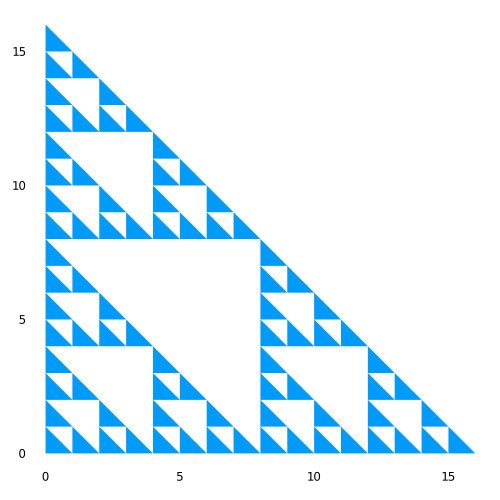

In [10]:
using Plots;
gr();
plot(px,py,seriestype=:shape,size=(500,500),
linewidth=-1,grid=false,axis=false,label=false)

## MergeSort algorithm
1. Divide array in two halves
2. Order subarrays
3. Merge, inserting the smallest element of each subarray  
Computation time $T(n)=O(n \log n)$

In [ ]:
function mergesort(a)
    n = length(a)
    m = div(n,2)
    m == 0 && return
    al = a[1:m]     #first half
    ar = a[m+1:end] #second half
    mergesort(al) #sort both
    mergesort(ar)
    i, j = 1, 1
    for k in 1:length(a)
        if j > n - m || (i <= m && al[i] < ar[j]) #element i of first array < element j of second array
            a[k] = al[i]
            i += 1
        else
            a[k] = ar[j]
            j += 1
        end
    end
end
    

## QuickSort algorithm
1. Choose a pivot
2. If an element is smaller than the pivot, out it on the left, else on the right
3. Subarrays recursively sorted  
Computation time $T(n)=O(n \log_2 n)$ or $O(n^2)$, depending on the pivot

In [ ]:
qsort(a) = isempty(a) ? copy(a) : vcat( qsort([x for x in a[2:end] if x < a[1]]), a[1], qsort([x for x in
a[2:end] if x >= a[1]]))
# isempty checks if a is empty
#vcat concatenates the qsort of left side, the pivot and qsort of right side

One solution to the issue of the computation time is to choose a random pivot. In this way, the computation time will be a random variable and we can compute its expected value: $T_n=O(n \log n)$

In [ ]:
function quicksort(V)         #quick sort with random pivot
    if length(V) <= 1
        return copy(V)
    end
    r = rand(1:length(V))                #choose a random index for the pivot
    V[1], V[r] = V[r], V[1]              #change first element with pivot
    L = [V[j] for j=2:length(V) if V[j] <= V[1]]  #left side
    R = [V[j] for j=2:length(V) if V[j] > V[1]]   #right side
    return [quicksort(L); V[1]; quicksort(R)]     #recursive sort on the two sides
end

Problem 7 (In-place QuickSort).  
Implement an “in-place” version of Quick-
Sort, in which arguments are indices i, j into the original vector

Problem 8 (Computing the arg).   
How can we extend the recursion in Example 4 to compute the actual values i*, j*,the argument of the max?

Problem 9 (Two-dimensional maximum subarray).   
Formulate and solve a
two-dimensional variant of Example

Problem 10 (Divide-and-conquer maximum subarray). When possible, a
binary division of the problem as in MergeSort may be preferable to tail
recursion, as the computation can be parallelized on a computer. Instead of
tail recursion, devise a binary divide-and-conquer approach to solve Example
4. Hint: enrich your problem to allow the solution of the larger problem
using the solutions of the subproblems.

Problem 11 (Recursive subsets). Design a recursive function to print the
(nk
) subsets of f1, . . . , ng of size k

Problem 12 (Growing Subsequences). Problem: given an array of numbers
v0, . . . vn􀀀1, nd the maximum k such that there exists p : 0  p1 <    <
pk  n 􀀀 1 with vp1  vp2      vpk .
Now the space of possible congurations is exponentially large in n, so
the trivial exhaustive solution is useless for moderately large n.

Problem 13 (*The k-th largest element on a list).
Given v1, . . . , vn 2 R, let p be a sorting permutation, i.e. p1, . . . , pn 2
f1, . . . , ng, with pi 6= pj if i 6= j such that:
vp1  vp2      vpn
Given k 2 f1, . . . , ng, consider the problem of nding vpk . A simple way
of nding vpk is to sort the list in decreasing order, and just take the k-th
element. This can be performed in O(n log n) time. However, it is clear
that for e.g. k = 1 or k = n one can do it in O(n) time by just looking
for the largest or smallest element in one single pass (and this generalizes
to any nite k or n 􀀀 k). What about intermediate values of k?
1. Design a recursion to compute vpk in average time O(n) (constant independent
of k). Once you devise your procedure, nd an explicit recursion
for the (average) computation time Tn and show that Tn = O(n). Hint:
think about QuickSort after splitting the list around the pivot: in which half vpk
will be? For the proof of Tn = O(n) ,assume Tn0  an0 for n0  n and
show that also that also Tn+1  a (n + 1) for a suitable a (independent
of n).

Problem 14 (Matrix product parenthetization). What is the most ecient
way of computing a product of k matrices of dierent (compatible shapes)?
That is, we have A1, . . . , Ak with Ai 2 Cnini+1 for i = 1, . . . , k and
we need to compute Õk
i=1 Ai. Note that for A 2 Cmn, B 2 Cnr, the
product AB is computed in time O(mnr). For example, for k = 3, n1 =
100, n2 = 1, n3 = 100, n4 = 1 it is better to compute A1 (A2A3) in time
O(100 + 100) than (A1A2) A3 in time O
􀀀
1002 + 1002
.